Word embedding algorithms like word2vec and GloVe are key to SOTA results achieved by neural network models on natural language processing problems. 

# Develop a Word2Vec Embedding
***
There are two main training algorithms that can be used to learn the embedding from text - the continuous bag of words and skip grams. 

You must pass a list of tokenized sentences (a list of lists). Sentences could be text loaded into memory, or an iterator that progressively loads text. 

You can also pass the `sg` parameter to the `Word2Vec` gensim constructor. `sg=0` means to use CBOW, and `sg=1` means to use skip gram.

After model is trained, you can access the word vector model via the `wv` attribute.

In [ ]:
model = Word2Vec(sentences)
words = list(model.wv.vocab)

We can look at the word vector for a specific token:

In [ ]:
model["word"]

Save a trained model to file using:

In [ ]:
model.wv.save_word2vec_format("model.bin")

If you want to inspect the learned model in ASCII format, you can set `binary=False` inside `save_word2vec_format`.

Then load the model with:

In [ ]:
model = Word2Vec.load("model.bin")

# Example
***

In [2]:
from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
model = Word2Vec(sentences, min_count=1)
print("Model specification: {}".format(model))
words = list(model.wv.vocab)
print("Vocabulary: {}".format(words))
print("Word Vector for Sentence: {}".format(model["sentence"]))
model.save("data/model.bin")

new_model = Word2Vec.load("data/model.bin")
print("New Model:\n{}".format(new_model))

Model specification: Word2Vec(vocab=14, size=100, alpha=0.025)
Vocabulary: ['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
Word Vector for Sentence: [-2.9490357e-03 -1.3630083e-03  1.6693189e-04  5.6463253e-04
  2.6425857e-03 -4.2731198e-03  4.1023493e-03  4.7875899e-03
 -1.8153833e-03  3.1510503e-03 -2.3427211e-04 -4.2115757e-03
 -1.4639411e-03 -3.6810183e-03  3.8812698e-03 -4.3745907e-03
 -1.8498360e-03 -3.2920244e-03 -4.1422327e-03 -2.3320068e-04
 -2.0652141e-03 -1.2088107e-03 -2.4696412e-03 -4.5302068e-03
 -8.3491299e-04  4.7976188e-03  3.8327351e-03 -1.5824118e-03
  3.3240602e-04  4.0838872e-03  1.3035192e-03  1.8270056e-03
  7.6625176e-05 -4.2106607e-04 -3.1754265e-03 -1.9469821e-03
 -1.1816279e-03 -4.7870814e-03  7.6359353e-04 -2.9783170e-03
 -1.6573471e-03 -3.1265905e-03  3.2525309e-03 -2.9644063e-03
  1.8559467e-03  4.6975049e-04 -2.4758787e-03 -3.0541420e-03
 -1.0114098e-03  3.0320561e-03 -1.5432007e-03 

/home/joseph/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


# Visualize Word Embedding
***

/home/joseph/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


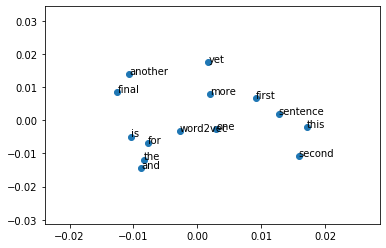

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# get all the vectors from a trained model
X = model[model.wv.vocab]
pca = PCA(n_components=2)
pca_fitted = pca.fit_transform(X)

plt.scatter(pca_fitted[:,0],pca_fitted[:,1])
for i, word in enumerate(list(model.wv.vocab)):
    plt.annotate(word, xy=(pca_fitted[i,0],pca_fitted[i,1]))
plt.show()

# Load Google's Word2Vec Embedding
***
Google has a pre-trained model of word vectors trained on Google news data. You can download it [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing). It is a 1.53 Gb file (zipped).

Gensim provides functionality to load files like this. 

In [ ]:
from gensim.models import KeyedVectors
filename = "GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(filename,binary=True)
result = model.most_similar(positive=["woman","king"],negative=["man"],topn=1)

# Load Stanford's GloVe Embedding
***

In [5]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = "data/glove_wikipedia_embeddings/glove.6B.100d.txt"
word2vec_output_file = "data/glove_wikipedia_embeddings/glove.6B.100d.txt.word2vec"
glove2word2vec(glove_input_file, word2vec_output_file)

/home/joseph/miniconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


(400000, 100)

This produced a copy of the GloVe model in word2vec format with name `glove.6B.100d.txt.word2vec`

Now we can load it and perform some arithmetic:

In [7]:
from gensim.models import KeyedVectors
filename = "data/glove_wikipedia_embeddings/glove.6B.100d.txt.word2vec"
model = KeyedVectors.load_word2vec_format(filename,binary=False)
result = model.most_similar(positive=["woman","king"],negative=["man"],topn=1)
print(result)

/home/joseph/miniconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


[('queen', 0.7698541283607483)]
